<a href="https://colab.research.google.com/github/alikaiser12/AI/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to Implement Anomaly Detection with Autoencoder:
Generate or load the data: We will simulate a dataset that has normal data and anomalies.

Preprocess the data: This includes normalizing the data and splitting it into training and testing sets.

Build the Autoencoder model: The autoencoder learns to reconstruct the normal data.

Train the model: We will train the autoencoder to minimize reconstruction loss on normal data.

Detect anomalies: After training, we will use the reconstruction error to identify anomalies.

Step 1: Generate or Load the Data
For this example, we will simulate normal data (a sine wave) and anomalies (outliers) added at random intervals.

python
Copy


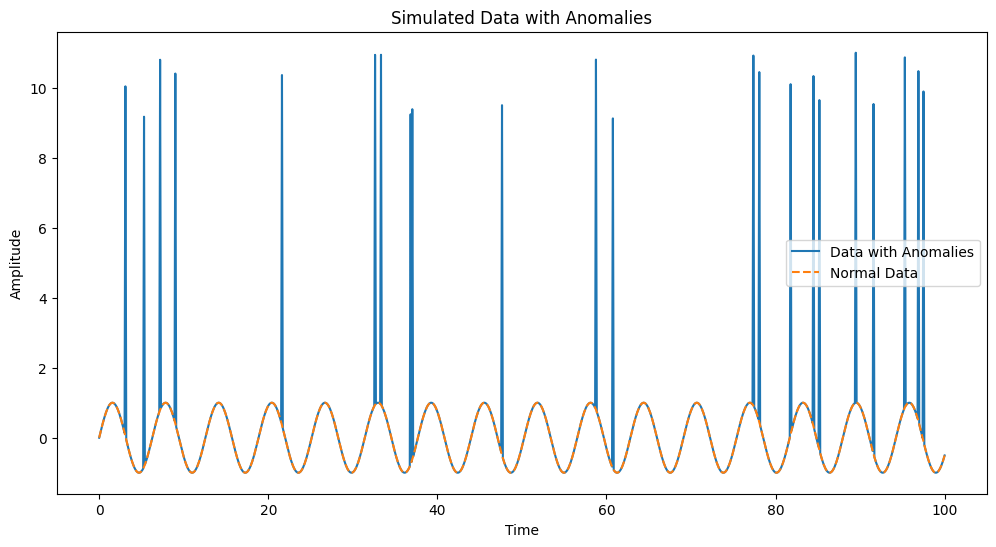

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Simulating normal data (a sine wave)
t = np.linspace(0, 100, 1000)
normal_data = np.sin(t)  # Normal data (sine wave)

# Introduce anomalies (outliers) by adding spikes at random intervals
anomalies = np.random.choice([0, 10], size=1000, p=[0.98, 0.02])  # 2% anomalies (spikes)
data_with_anomalies = normal_data + anomalies  # Add anomalies to normal data

# Visualize the data with anomalies
plt.figure(figsize=(12, 6))
plt.plot(t, data_with_anomalies, label="Data with Anomalies")
plt.plot(t, normal_data, label="Normal Data", linestyle='--')
plt.title("Simulated Data with Anomalies")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


Step 2: Preprocess the Data
We will normalize the data to the range [0, 1] and split it into training and testing sets. We will train the autoencoder using only normal data.

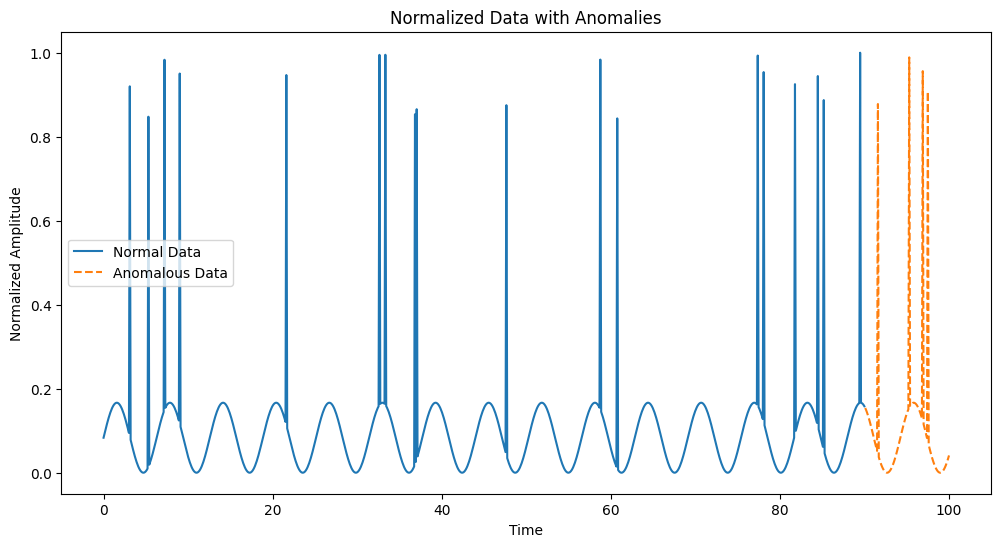

In [2]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_with_anomalies.reshape(-1, 1))

# Split the data into normal and anomalous
normal_data_normalized = normalized_data[:900]  # Normal data
anomalous_data_normalized = normalized_data[900:]  # Anomalous data

# Visualize the normalized data
plt.figure(figsize=(12, 6))
plt.plot(t[:900], normal_data_normalized, label="Normal Data")
plt.plot(t[900:], anomalous_data_normalized, label="Anomalous Data", linestyle='--')
plt.title("Normalized Data with Anomalies")
plt.xlabel("Time")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.show()


Step 3: Build the Autoencoder Model
We will define a simple autoencoder model using Keras. The encoder will compress the data into a smaller latent representation, and the decoder will reconstruct the data.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the Autoencoder Model
autoencoder = Sequential()

# Encoder: Compress the data into 16 dimensions (latent space)
autoencoder.add(Dense(128, activation='relu', input_dim=1))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(16, activation='relu'))  # Bottleneck (latent space)

# Decoder: Reconstruct the data back to original dimensions
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Summarize the model
autoencoder.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,225 (86.82 KB)

 Trainable params: 22,225 (86.82 KB)

 Non-trainable params: 0 (0.00 B)

Step 4: Train the Autoencoder Model
We will train the autoencoder model on normal data. The goal is for the model to learn to reconstruct normal data accurately.

In [4]:
# Train the autoencoder using normal data (without anomalies)
autoencoder.fit(normal_data_normalized, normal_data_normalized, epochs=50, batch_size=32, validation_data=(normal_data_normalized, normal_data_normalized))


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1544 - val_loss: 0.0271
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0251 - val_loss: 0.0143
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - val_loss: 0.0029
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 3.8090e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7385e-04 - val_loss: 2.0091e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0209e-04 - val_loss: 1.7799e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6441e-04 - val_loss: 1.6240e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8425e-04 - val_loss: 1.7934e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3556e-04 - val_loss: 1.6111e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4795e-04 - val_loss: 1.2857e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3803e-04 - val_loss: 1.1710e-04
Epoch 12/50


Step 5: Detect Anomalies
After training the model, we will use the reconstruction error to identify anomalies. If the reconstruction error for a data point is large, we classify it as an anomaly.

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


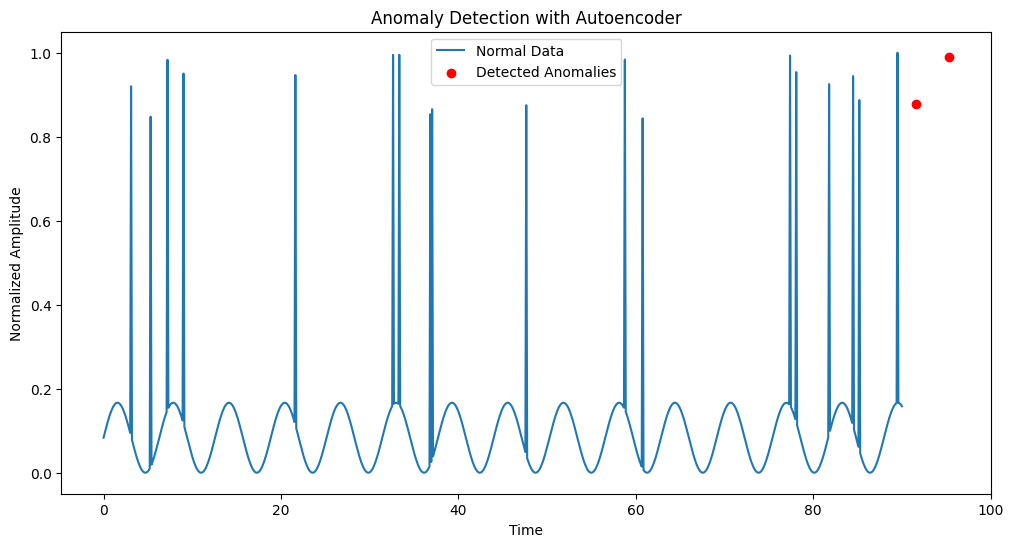

Number of detected anomalies: 2


In [5]:
# Predict the reconstruction (reconstruct the normal data)
reconstructed_data = autoencoder.predict(normal_data_normalized)

# Calculate the reconstruction error (mean squared error between the input and reconstructed data)
reconstruction_error = np.mean(np.square(normal_data_normalized - reconstructed_data), axis=1)

# Set a threshold for anomaly detection based on reconstruction error (using mean + 3 standard deviations)
threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)

# Detect anomalies in the anomalous data by checking if their reconstruction error exceeds the threshold
anomalous_reconstruction_error = np.mean(np.square(anomalous_data_normalized - autoencoder.predict(anomalous_data_normalized)), axis=1)
anomalies = anomalous_reconstruction_error > threshold

# Visualize the detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(t[:900], normal_data_normalized, label="Normal Data")
plt.scatter(t[900:][anomalies], anomalous_data_normalized[anomalies], color='red', label="Detected Anomalies", zorder=5)
plt.title("Anomaly Detection with Autoencoder")
plt.xlabel("Time")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.show()

# Print the number of detected anomalies
print(f"Number of detected anomalies: {np.sum(anomalies)}")


xplanation of the Code:
Autoencoder Model: The model consists of an encoder that compresses the data into a smaller latent space and a decoder that reconstructs the data from this compressed form. The model is trained to minimize the reconstruction error (the difference between the input and the reconstructed data).

Reconstruction Error: After training, we compute the mean squared error between the original input and the reconstructed data. This error will be small for normal data points and large for anomalous points.

Anomaly Detection: We use the reconstruction error to detect anomalies. If the reconstruction error is larger than a predefined threshold, we classify the data point as an anomaly.

Step 6: Conclusion
Anomaly Detection: This method works well for identifying outliers or unusual data points that differ from the normal patterns learned by the autoencoder.

Reconstruction Error: The reconstruction error is a key indicator of anomaly. Data points with high reconstruction errors are classified as anomalies.

Threshold: The threshold for detecting anomalies is set based on the mean and standard deviation of the reconstruction errors of the normal data.